In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
##### tgl 29 jam 12 malam

In [239]:
demo = pd.read_csv('county_facts.csv')
pri = pd.read_csv('primary_results.csv')

In [240]:
demo = demo[['fips','area_name','state_abbreviation','PST045214','RHI225214',
                             'RHI725214','RHI325214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210',
                             'VET605213','HSD410213','NES010213','SBO315207','SBO215207','SBO415207','SBO015207','INC910213']]
demo.rename(columns={'PST045214': 'Population','RHI225214':'Black','RHI725214':'Latino','RHI325214':'AmericanIndian',
                            'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'MediHouseInc','PVY020213':'Kurang Mampu','POP060210':'Density','VET605213':'Veteran',
                            'HSD410213':'Rumah Tangga','NES010213':'Pengangguran','SBO315207':'BlackownFirm','SBO215207':'AsianowmFirm',
                            'SBO415207':'LatinoownFirm','SBO015207':'WomenownFirm','INC910213':'incomepercapita'}, inplace=True)
for col in demo.columns: 
    print(col) 

fips
area_name
state_abbreviation
Population
Black
Latino
AmericanIndian
White
HighSchool
Bachelors
MediHouseInc
Kurang Mampu
Density
Veteran
Rumah Tangga
Pengangguran
BlackownFirm
AsianowmFirm
LatinoownFirm
WomenownFirm
incomepercapita


In [14]:
#Reading Results CSV File
results = pd.read_csv('primary_results.csv')
results = results[results.party == "Republican"]
# results = results[(results.state != "Maine") & (results.state != "Massachusetts") & (results.state != "Vermont") & (results.state != "Illinois") ]
# results = results[(results.candidate != 'No Preference') & (results.candidate != ' Uncommitted')]
results = results[(results.candidate == "Donald Trump") | (results.candidate != "Donald Trump") ]
Rep = results
Rep.candidate.unique()

array(['Ben Carson', 'Donald Trump', 'John Kasich', 'Marco Rubio',
       'Ted Cruz', 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum'], dtype=object)

In [217]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() 
                for party in Rep.party.unique()]
for i in votesByState:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbsRep = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])


In [16]:
# allData = pd.merge(vbs, demo, how="inner", left_on = 'state',right_on = 'area_name')
# # allData.corr()['partyFrac']
# # allData.dropna()
# # allData.area_name.unique()
# allData

In [17]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# allData['state1']= le.fit_transform (allData['state'])
# allData.head()

In [18]:
# demo['state1']= le.fit_transform (demo['area_name'])
# demo.head()

In [224]:
#Merging demographics and results
allDataRep = pd.merge(vbsRep, demo, how="inner", left_on = 'state',right_on = 'area_name')
allDataRep.drop('state_abbreviation',axis=1, inplace=True)
allDataRep.head()
# #Segregate data candidate wise
DNT = allDataRep[(allDataRep.candidate == "Donald Trump")] #| (allData.candidate != "Donald Trump")]
DNT = DNT.reset_index();
DNT.drop('index',axis=1, inplace=True)


In [228]:
#Select X for Prediction
feature_cols = ['Population','Black','Latino','White','HighSchool','Bachelors','MediHouseInc','Kurang Mampu','Density','Veteran',
                'Rumah Tangga','Pengangguran','AsianowmFirm','LatinoownFirm','WomenownFirm','incomepercapita']
X = DNT[feature_cols]

#Select y for Prediction
y = DNT.partyFrac




In [22]:
# from sklearn.model_selection import train_test_split

In [23]:
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
# model.score(x_test, y_test)

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

## Model

In [231]:
RFR = RandomForestRegressor(n_estimators=15000)
RID = Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
LASS = Lasso(max_iter=100000)
ELA = ElasticNet(max_iter=100000)
LIN = LinearRegression()

#train model
RFR.fit(X,y)
RID.fit(X,y)
LASS.fit(X,y)
ELA.fit(X,y)
LIN.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Linear Regression')

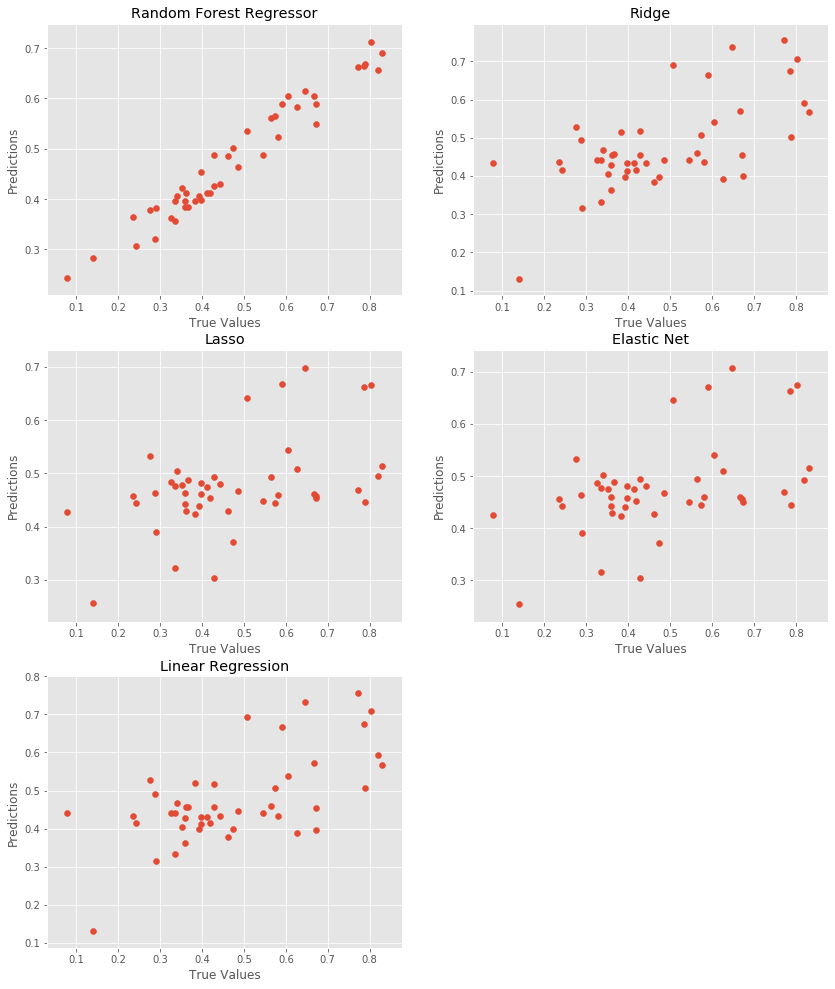

In [213]:

plt.figure(figsize=(14,17))

plt.subplot(321)
p = RFR.predict(X)
plt.scatter(y, p)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor')

plt.subplot(322)
pp = RID.predict(X)
plt.scatter(y, pp)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge')


plt.subplot(323)
ppp = LASS.predict(X)
plt.scatter(y, ppp)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso')


plt.subplot(324)
pppp = ELA.predict(X)
plt.scatter(y, pppp)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Elastic Net')


plt.subplot(325)
ppppp = LIN.predict(X)
plt.scatter(y, ppppp)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')



-------------------------------------------------

In [232]:
print('Train accuracy score')
print('--------------------------')
print('RandomForestRegressor:',RFR.score(X,y))
print('Ridge :',RID.score(X,y))
print('Lasso: ',LASS.score(X,y))
print('Elastic Net : ',ELA.score(X,y))
print('Linear Regression: ',LIN.score(X,y))
  

Train accuracy score
--------------------------
RandomForestRegressor: 0.8384081246641854
Ridge : 0.401035635369305
Lasso:  0.23213673170416893
Elastic Net :  0.2327062660045339
Linear Regression:  0.40124555817521224


------------------------------------------------------------

In [248]:
#test model
demo1=demo[(demo.area_name=='Alaska')]
demo2=demo[(demo.area_name=='Connecticut')]
demo3=demo[(demo.area_name=='Maryland')]
demo4=demo[(demo.area_name=='Alabama')]
demo5=demo[(demo.area_name=='New York')]
demo6=demo[(demo.area_name=='Pennsylvania')]
demo7=demo[(demo.area_name=='Florida')]
demo8=demo[(demo.area_name=='Georgia')]


## Random Forest Regressor

In [249]:
X_test1=demo1[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demo2[feature_cols]
y_pred4=RFR.predict(X_test1)
xx = np.append(xx, y_pred4[0]);

X_test1=demo3[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo4[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo5[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo6[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo7[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo8[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

In [253]:
pred =pd.Series(xx, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia']) 
x1 = np.array([.33,.59,.565,.443,.604,.580,.473,.393])
real = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])

In [254]:
a = DNT[(DNT.state == 'Pennsylvania')]
a = a['partyFrac'].mean()
a

0.5805451792812103

              Predicted   Real
Alaska         0.393256  0.330
Connecticut    0.589109  0.590
Maryland       0.561436  0.565
Alabama        0.430443  0.443
New York       0.603595  0.604
Pennsylvania   0.520484  0.580
Florida        0.501214  0.473
Georgia        0.406169  0.393


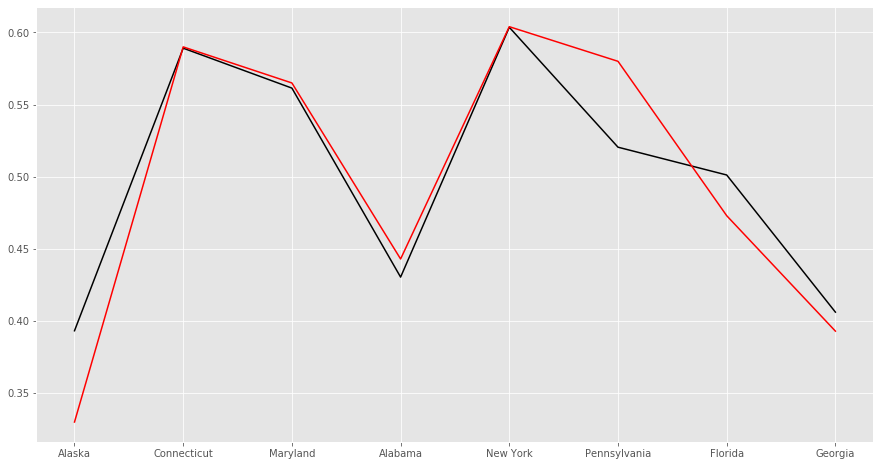

In [260]:
e = {'Predicted' : pred,'Real' : real}
final=pd.DataFrame(e)
print(final)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred,'black')  # Pred
plt.plot(real,'r') # Real
plt.show()

In [256]:
# print(np.sqrt(mean_squared_error(a,b)))
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score


print(f'MAX ERROR RFR : {round(max_error(pred,real),3)*100}')
print(f'MSE RFR : {round(mse(pred,real),5)} ')
print(f'MAE RFR: {round(mae(pred,real),3)*100} ')
print(f'MDAE RFR: {round(mdae(pred,real),3)*100} ')
print(f'RMSLE RFR: {round(np.sqrt(msle(pred,real)),3)*100} ')
print(f'R2 Score RFR : {round(r2_score(pred,real),3)*100} ')

MAX ERROR RFR : 6.3
MSE RFR : 0.00109 
MAE RFR: 2.3 
MDAE RFR: 1.3 
RMSLE RFR: 2.3 
R2 Score RFR : 81.89999999999999 


### Lasso

In [167]:
X_test2=demo1[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo2[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo3[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo4[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo5[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

In [168]:
a = DNT[(DNT.state == 'New York')]
a = a['partyFrac'].mean()
a

0.6040734786596347

In [169]:
pred2 =pd.Series(xx2, index=['Alaska','Connecticut','Maryland','Delaware','New York']) 
x1 = np.array([.33,.59,.565,.626,.604])
real2 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Delaware','New York'])

             Predicted   Real
Alaska        0.321432  0.330
Connecticut   0.668227  0.590
Maryland      0.493794  0.565
Delaware      0.480511  0.626
New York      0.543065  0.604


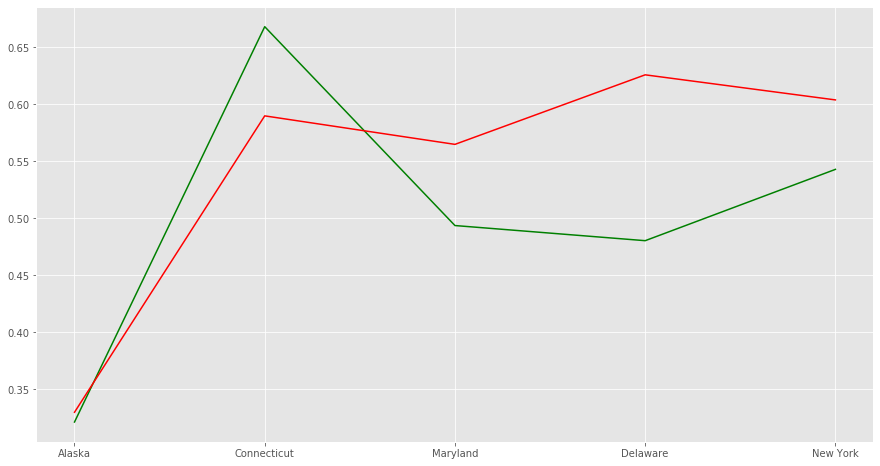

In [177]:
f = {'Predicted' : pred2,'Real' : real2}
final2=pd.DataFrame(f)
print(final2)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred2,'g')  # Pred
plt.plot(real2,'r') # Real
plt.show()


In [195]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR LASSO : {round(max_error(pred2,real2),2)*100} ')
print(f'MSE LASSO : {(round(mse(pred2,real2),3))*100} ')
print(f'RMSE LASSO : {np.sqrt(round(mse(pred2,real2),3)*100)} ')
print(f'MAE LASSO: {round(mae(pred2,real2),2)*100} ')
print(f'MDAE LASSO: {round(mdae(pred2,real2),2)*100} ')
print(f'RMSLE LASSO : {round(np.sqrt(msle(pred2,real2)),3)*100} ')
print(f'R2 Score LASSO : {round(r2_score(pred2,real2),2)*100} ')

MAX ERROR LASSO : 15.0 
MSE LASSO : 0.7000000000000001 
RMSE LASSO : 0.8366600265340756 
MAE LASSO: 7.000000000000001 
MDAE LASSO: 7.000000000000001 
RMSLE LASSO : 5.4 
R2 Score LASSO : 42.0 


### RIDGE

In [188]:
X_test3=demo1[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.array(y_pred3);

X_test3=demo2[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo3[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo4[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo5[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

In [189]:
pred3 =pd.Series(xx3, index=['Alaska','Connecticut','Maryland','Delaware','New York']) 
x2 = np.array([.33,.59,.565,.626,.604])
real3 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Delaware','New York'])

             Predicted   Real
Alaska        0.331089  0.330
Connecticut   0.664844  0.590
Maryland      0.458805  0.565
Delaware      0.434913  0.626
New York      0.540178  0.604


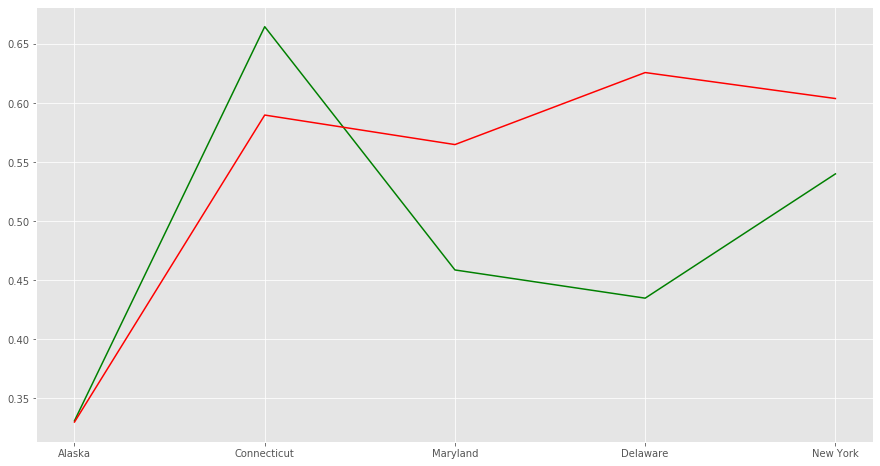

In [190]:
g = {'Predicted' : pred3,'Real' : real3}
final3=pd.DataFrame(g)
print(final3)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred3,'g')  # Pred
plt.plot(real3,'r') # Real
plt.show()


In [196]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR RIDGE : {round(max_error(pred3,real3),2)*100} ')
print(f'MSE RIDGE : {(round(mse(pred3,real3),3))*100} ')
print(f'RMSE RIDGE : {np.sqrt(round(mse(pred3,real3),3)*100)} ')
print(f'MAE RIDGE : {round(mae(pred3,real3),2)*100} ')
print(f'MDAE RIDGE : {round(mdae(pred3,real3),2)*100} ')
print(f'RMSLE RIDGE : {round(np.sqrt(msle(pred3,real3)),3)*100} ')
print(f'R2 Score RIDGE : {round(r2_score(pred3,real3),2)*100} ')

MAX ERROR RIDGE : 19.0 
MSE RIDGE : 1.0999999999999999 
RMSE RIDGE : 1.0488088481701514 
MAE RIDGE : 9.0 
MDAE RIDGE : 7.000000000000001 
RMSLE RIDGE : 7.000000000000001 
R2 Score RIDGE : 8.0 


In [261]:
print ("Future Pedictions - Donald Trump")

#Select Future States 
#Change name of state for other states
demo11=demo[(demo.area_name=='Alaska')]
demo12=demo[(demo.area_name=='Washington')]
demo13=demo[(demo.area_name=='Texas')]
demo14=demo[(demo.area_name=='Colorado')]
demo15=demo[(demo.area_name=='Florida')]
demo16=demo[(demo.area_name=='Michigan')]
demo17=demo[(demo.area_name=='Missouri')]
demo18=demo[(demo.area_name=='Oregon')]


X_test1=demo11[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Alaska = {(round((y_pred4[0])*100))} %')

X_test1=demo12[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Washington = {(round((y_pred4[0])*100))} %')

X_test1=demo13[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Texas = {(round((y_pred4[0])*100))} %')

X_test1=demo14[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Colorado = {(round((y_pred4[0])*100))} %')

X_test1=demo15[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Florida = {(round((y_pred4[0])*100))} %')

X_test1=demo16[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Michigan = {(round((y_pred4[0])*100))} %')

X_test1=demo17[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Missouri = {(round((y_pred4[0])*100))} %')

X_test1=demo18[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Oregon = {(round((y_pred4[0])*100))} %')


Future Pedictions - Donald Trump
Alaska = 39.0 %
Washington = 67.0 %
Texas = 37.0 %
Colorado = 57.0 %
Florida = 50.0 %
Michigan = 40.0 %
Missouri = 41.0 %
Oregon = 60.0 %


In [168]:
a = DNT[(DNT.state == 'Alaska')]
a = a['partyFrac'].mean()
a

0.3349749202006384